# This is the recreation of the first problem of A Neural Network in 11 lines of code

https://iamtrask.github.io/2015/07/12/basic-python-network/

In [1]:
import numpy as np #array handling
import matplotlib.pyplot as plt #graphs

In [2]:
#The activation function and its derivative form
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_d(x):
    return sigmoid(x)*(1-sigmoid(x))

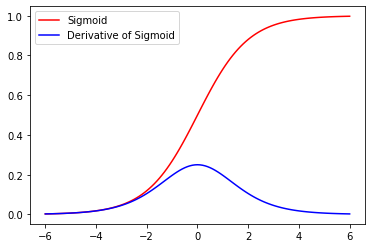

In [3]:
#Testing our activationg function and its derivative

#Calculation
graph_x = np.arange(-6,6.1,0.1)
sigmoid_graph = sigmoid(graph_x)
sigmoid_d_graph = sigmoid_d(graph_x)

#Graph
fig, ax = plt.subplots()
ax.plot(graph_x, sigmoid_graph, color='r', label='Sigmoid')
ax.plot(graph_x, sigmoid_d_graph, color='b', label='Derivative of Sigmoid')
legend = ax.legend(loc='upper left')
plt.show()

In [4]:
#The dataset
#Instead of following along the tutorial, we're putting both the inputs and the outputs in the same array
data = np.array([
        [0,0,1,0],
        [0,1,1,0],
        [1,0,1,1],
        [1,1,1,1]
])

In [5]:
#Function to organize it in inputs/outputs
#Assuming the Outputs are in the last columns

def data_to_in_out_put(data, output_n_cols=1):
    inputs = data[:,:-output_n_cols]
    output = data[:,[-output_n_cols]]
    return inputs, output

In [6]:
x, y = data_to_in_out_put(data)
print('Inputs:')
print(x)
print('Output:')
print(y)
print('x shape: {} y shape: {}'.format(x.shape,y.shape))

Inputs:
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
Output:
[[0]
 [0]
 [1]
 [1]]
x shape: (4, 3) y shape: (4, 1)


In [7]:
n_inputs = x[0].shape[0]
n_outputs = y[0].shape[0] 
n_records = len(x)
    
print('Number of inputs: {} Number of outputs: {} Number of records {}'.format(n_inputs,n_outputs,n_records))

Number of inputs: 3 Number of outputs: 1 Number of records 4


In [8]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

In [9]:
#Weights layer
#Initialize it randomly
'''
np.random.random generates a number between 0 and 1. Multiplying by 2 then subtracting by 1
forces the random weight generation vary between -1 and 1
'''
weights = 2*np.random.random((n_inputs,n_outputs)) - 1
print(weights)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [10]:
training_steps = 1001

for i in range(training_steps):
    
    #get the inputs as layer0(l0)
    l0 = x
    
    #make a prediction
    #This is our activation function of the inputs times the weights
    prediction = sigmoid(np.dot(l0,weights))
    
    #calculate the error
    error = y - prediction
    
    #calculate the adjust factor
    #Error * the derivative of our prediction
    delta = error * sigmoid_d(prediction)
    
    #print(np.dot(l0.T,delta).shape)
    
    #adjust the weights and restart
    weights += np.dot(l0.T,delta)
    
    if(i % 100 == 0):
        print('Prediction at training step {}'.format(i))
        for pred in range(len(prediction)):            
            print( "{:.5f}".format(prediction[pred,0]))
        

Prediction at training step 0
0.26899
0.36375
0.23763
0.32628
Prediction at training step 100
0.06871
0.05027
0.95795
0.94234
Prediction at training step 200
0.03582
0.02486
0.97910
0.96984
Prediction at training step 300
0.02410
0.01646
0.98614
0.97967
Prediction at training step 400
0.01813
0.01228
0.98964
0.98470
Prediction at training step 500
0.01452
0.00980
0.99173
0.98774
Prediction at training step 600
0.01210
0.00814
0.99312
0.98977
Prediction at training step 700
0.01037
0.00697
0.99411
0.99123
Prediction at training step 800
0.00908
0.00609
0.99485
0.99233
Prediction at training step 900
0.00807
0.00540
0.99543
0.99318
Prediction at training step 1000
0.00726
0.00486
0.99589
0.99386
